In [1]:
import numpy as np
from scipy import misc
import os
import matplotlib.pyplot as plt
import time
from multiprocessing import Pool, Value
from random import shuffle, randint
import pickle
import keras

Using TensorFlow backend.


In [2]:
classes = ['dog', 'cat']
train_folder = os.path.join('./', 'train')
valid_folder = os.path.join('./', 'valid')

train_length = 21000
valid_length = 4000
#size for rescaling images
size = (256, 256)
channels = 3

# Define model

In [3]:
from keras.models import Sequential, Model
from keras.constraints import max_norm
from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Flatten,InputLayer, Input, AveragePooling2D
#Defien model
model = Sequential()

model.add(InputLayer(input_shape=(size[1], size[0], 3)))

#Convolution 1
model.add(Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Dropout(rate=0.3))
model.add(Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=2, strides=2))

#Convolution 2
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Dropout(rate=0.3))

#Convolution 3
model.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Dropout(rate=0.3))

#Convolution 5
# model.add(Conv2D(filters=128, kernel_size=2, activation='elu'))
# model.add(Dropout(rate=0.1))

# #Convolution 6
# model.add(Conv2D(filters=128, kernel_size=3, activation='elu'))
# model.add(Dropout(rate=0.1))
# model.add(AveragePooling2D(pool_size=2, strides=2))

# #Convolution 6
# model.add(Conv2D(filters=64, kernel_size=3, activation='elu'))
# model.add(Dropout(rate=0.1))
# model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Flatten())
#Dense 1 
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(rate=0.5))
#Final
model.add(Dense(units=1, activation='sigmoid'))

#continue learning
#model.load_weights('./6convmorefilters.weights')

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 16)      2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 32)        4640      
__________

In [5]:
model.load_weights('./model_4_128_weigths.weights')

# Train model

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1. / 255)

valid_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(train_folder, target_size=size, batch_size=64, class_mode='binary')
valid_generator = valid_datagen.flow_from_directory(valid_folder, target_size=size, batch_size=64, class_mode='binary')

Found 21000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [7]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, Callback
from keras_tqdm import TQDMNotebookCallback
#Add callbacks
checkpointer = ModelCheckpoint('./model_4_128_weigths.weights', 
                               monitor='val_acc', 
                               save_best_only=True,                               
                               verbose=2)
early_stopping = EarlyStopping(patience=4)
progress_bar = TQDMNotebookCallback(leave_inner=True)


model.fit_generator(
    train_generator,
    steps_per_epoch=train_length/64,
    epochs=50,
    validation_data=valid_generator,
    validation_steps=valid_length/64,
    initial_epoch=0,
    verbose=0,
    callbacks=[checkpointer, early_stopping, progress_bar])

HBox(children=(IntProgress(value=0, description=u'Training', max=50), HTML(value=u'')))

HBox(children=(IntProgress(value=0, description=u'Epoch 0', max=328), HTML(value=u'')))

KeyboardInterrupt: 

In [7]:
model.save('./model_4.model')

(64, 256, 256, 3)


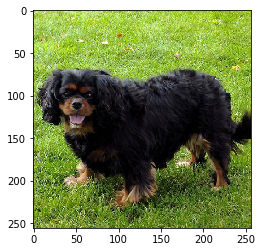

1.0
[[  9.37475860e-01]
 [  5.68603635e-01]
 [  6.29048038e-04]
 [  2.91119704e-07]
 [  9.80215967e-01]
 [  3.89693499e-01]
 [  3.62528022e-04]
 [  7.69290686e-01]
 [  1.00000000e+00]
 [  9.99976993e-01]
 [  9.20744956e-01]
 [  9.49244022e-01]
 [  7.93111145e-01]
 [  2.28446574e-04]
 [  9.99998927e-01]
 [  9.93493855e-01]
 [  9.99951243e-01]
 [  2.60487664e-02]
 [  1.55696145e-03]
 [  2.76880581e-02]
 [  9.83288229e-01]
 [  4.63183820e-02]
 [  6.59939587e-01]
 [  7.75161237e-02]
 [  7.68533647e-01]
 [  6.41946435e-01]
 [  9.99936342e-01]
 [  2.56646834e-02]
 [  4.32711022e-05]
 [  8.54618788e-01]
 [  9.99318838e-01]
 [  9.99902606e-01]
 [  1.14135670e-04]
 [  2.97677428e-01]
 [  8.58580709e-01]
 [  9.99883413e-01]
 [  5.71148805e-02]
 [  4.28541191e-03]
 [  4.33637016e-03]
 [  4.50569525e-04]
 [  9.08550560e-01]
 [  9.98370826e-01]
 [  2.74351594e-04]
 [  1.61355454e-02]
 [  2.82063812e-01]
 [  2.40231324e-02]
 [  9.93795991e-01]
 [  1.26995437e-04]
 [  9.07338440e-01]
 [  2.67602806e-

In [9]:
for i in train_generator:
    print(i[0].shape)
    plt.imsave( 'a.jpg',i[0][0])
    plt.imshow(i[0][0])
    plt.show()
    print(i[1][0])
    print(model.predict(i[0]))
    break

f - medium kernels increasing than decreasing num of filters
model_1 - medium kernels(844222) pyramidal number of filters small num of fullyconncted
    on 128 learned very slowly by about 3% per epoch stopped at 70%
    
    
model_2 smaller kernels (553333) pyramidal filters small fullyconnected
    without dropout on last converged to 70 while test acc 80
    
    
model_3 smaller kernels (553333) pyramidal filters small fullyconnected more dropout
    
model_4 4 conv layers
    64x64 converged to 0.66053
    0.72

In [20]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K


# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = './train'
validation_data_dir = './valid'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

model.save_weights('first_try.h5')

Found 21000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
Epoch 1/50
125/125 [==============================] - 14s - loss: 0.7049 - acc: 0.5325 - val_loss: 0.6886 - val_acc: 0.5062
Epoch 2/50
125/125 [==============================] - 13s - loss: 0.6746 - acc: 0.6015 - val_loss: 0.7093 - val_acc: 0.5038
Epoch 3/50
125/125 [==============================] - 13s - loss: 0.6489 - acc: 0.6340 - val_loss: 0.6667 - val_acc: 0.5950
Epoch 4/50
125/125 [==============================] - 13s - loss: 0.6083 - acc: 0.6775 - val_loss: 0.5805 - val_acc: 0.6975
Epoch 5/50
125/125 [==============================] - 13s - loss: 0.6143 - acc: 0.6765 - val_loss: 0.5635 - val_acc: 0.7125
Epoch 6/50
125/125 [==============================] - 13s - loss: 0.5976 - acc: 0.6905 - val_loss: 0.5340 - val_acc: 0.7625
Epoch 7/50
125/125 [==============================] - 12s - loss: 0.5766 - acc: 0.7095 - val_loss: 0.5724 - val_acc: 0.7188
Epoch 8/50
125/125 [===========================

KeyboardInterrupt: 